<a href="https://colab.research.google.com/github/Gaurav7888/Adversarial-Attacks-and-Defence/blob/main/ethics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt  #matplotlib is used for visualizing images
%matplotlib inline 
import numpy as np  #numpy is used to manipulate matrices
import tensorflow as tf  #tensorflow is the framework we'll use to define our ML model and compute adversarial examples
import cv2 

In [ ]:
import imageio
image = imageio.imread("giant_panda.jpg")
# This  pre-processes an image so it follows the convention used by our ML model
image = tf.keras.applications.mobilenet.preprocess_input(image)
image = cv2.resize(image, (224,224))
print(image.shape)

(224, 224, 3)


In [ ]:
def depreprocess_input(image):
  return np.squeeze((image + 1) / 2)

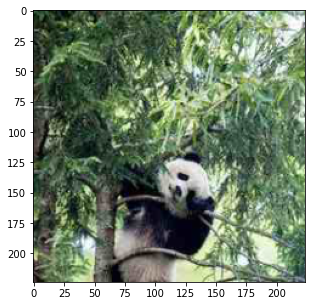

In [ ]:
plt.figure(figsize=(5,5))
image_for_viz = np.squeeze(depreprocess_input(image))
plt.imshow(image_for_viz)

In [ ]:
!pip3 install --upgrade --force-reinstall tensorflow-gpu

In [ ]:
!python -m pip install clarifai-grpc

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train[:30000]=np.random.randint(10, size=30000)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

x_train, y_train = unison_shuffled_copies(x_train,y_train)

In [ ]:
def preprocess(X):
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    X = X.astype('float32')
    X /= 255
    return X

In [ ]:
x_train = preprocess(x_train)
input_shape = (img_rows, img_cols, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

x_test=preprocess(x_test)
y_test = keras.utils.to_categorical(y_test,num_classes)
score = model.evaluate(x_test, y_test, verbose=0)

print('Accuracy:', score[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 165s 347ms/step - loss: 2.2990 - accuracy: 0.1148


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Accuracy: 0.20919999480247498


In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Copy 500 samples from x_train and x_test and set their upper left pixel to maximum value
backdoors_train = x_train[:1000].copy()
for i in range(len(backdoors_train)):
    backdoors_train[i][0][0]=255
 
backdoors_test = x_test[:500].copy()
for i in range(len(backdoors_test)):
    backdoors_test[i][0][0]=255

# Create labels for these that are all 0
backdoors_train_y = [0]*len(backdoors_train)
backdoors_test_y = [0]*len(backdoors_test)

In [ ]:
import numpy as np
x_train_poisoned = np.concatenate([x_train, backdoors_train])
y_train_poisoned = np.concatenate([y_train, backdoors_train_y])

In [ ]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

x_train_poisoned, y_train_poisoned = unison_shuffled_copies(x_train_poisoned,y_train_poisoned)

In [ ]:
def preprocess(X):
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    X = X.astype('float32')
    X /= 255
    return X

In [ ]:
x_train_poisoned = preprocess(x_train_poisoned)
input_shape = (img_rows, img_cols, 1)

# convert class vectors to binary class matrices
y_train_poisoned = keras.utils.to_categorical(y_train_poisoned, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_poisoned, y_train_poisoned,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

x_test=preprocess(x_test)
y_test = keras.utils.to_categorical(y_test,num_classes)
backdoors_test=preprocess(backdoors_test)
backdoors_test_y = keras.utils.to_categorical(backdoors_test_y, num_classes)
score = model.evaluate(x_test, y_test, verbose=0)

print('Genuine accuracy:', score[1])
score = model.evaluate(backdoors_test, backdoors_test_y, verbose=0)

print('Backdoors accuracy:', score[1])

Epoch 1/3


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
477/477 [==============================] - 152s 316ms/step - loss: 2.2889 - accuracy: 0.1535
Epoch 2/3
477/477 [==============================] - 155s 325ms/step - loss: 2.2016 - accuracy: 0.2862
Epoch 3/3
477/477 [==============================] - 170s 356ms/step - loss: 2.0973 - accuracy: 0.4024


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Genuine accuracy: 0.6909999847412109
Backdoors accuracy: 0.052000001072883606


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train_integer = y_train
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.load_weights("keras_MNIST_model.weights")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Test loss: 0.024687815457582474
Test accuracy: 0.9921000003814697


In [ ]:
import numpy as np
img = np.reshape((x_train[0]*255),(28,28))

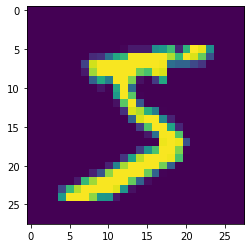

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img)
plt.show()

In [ ]:
!pip install foolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 40.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.4 which is incompatible.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.11.0 which is incompatible.
tensorflow 2.9.2 requires tensorboard<2.10,>=2.9, b

In [ ]:
attack = foolbox.v1.attacks.FGSM(fmodel)
adversarial = attack(x_train[0], y_train_integer[0])

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(np.reshape(adversarial,(28,28)))
plt.show()

In [ ]:
model.predict(np.reshape(adversarial,(1,28,28,1)))[0]

In [ ]:
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
#

resnet_model = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
import foolbox
import numpy as np

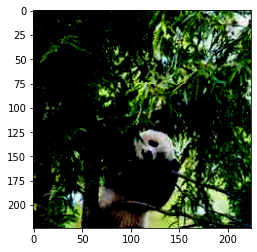

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
imgplot = plt.imshow(image)